Here we try to explore possibilities to score the reliability of an edge in the network.
One idea is to look at all possible solutions and see how often a certain edge is present in the network. 
Like this we can find edges that are more often/ less often in the solution

In [1]:

#generate data do compare network quality
import sys
import numpy as np
sys.path.insert(0, '../../helperScripts/')
sys.path.insert(0,'/home/t.stohn/Tools/CPLEX_Studio201/cplex/python/3.8/x86-64_linux')

from helperFunctions import *


In [36]:
%%capture

CELLS = 200
NOISE = 0.2
missingNodes = []

pertubationIndices = None
rglob, rtot, cell_annot, tx_annot, pDict = combine_control_and_perturbed_cells(pertubationIndices, cellNum = CELLS, noise = NOISE, scaleByTxGroupIndividually = False)
rtot = rtot.drop(missingNodes, axis=0)

eta = 0.001

#make MRA simulation
scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot)
p = scmra.ScMraProblem(scd, eta=eta, modelPertRloc=False, modelPertStot=False, modelOffset=False) #0.3765 1pert   #0.5566 11pert #zero 0.02775
p.cpx.write("test.lp")
p.cpx.solve()
s = scmra.ScMraResult(p)

In [37]:
%%capture
#1
p = scmra.ScMraProblem(scd, eta=eta, modelPertRloc=False, modelPertStot=False, modelOffset=False, networkConstraints=[s.imap]) #0.3765 1pert   #0.5566 11pert #zero 0.02775
p.cpx.write("test_2.lp")
p.cpx.solve()
t = scmra.ScMraResult(p)


In [38]:
%%capture
#1
p = scmra.ScMraProblem(scd, eta=eta, modelPertRloc=False, modelPertStot=False, modelOffset=False, networkConstraints=[s.imap ,t.imap]) #0.3765 1pert   #0.5566 11pert #zero 0.02775
p.cpx.write("test_2.lp")
p.cpx.solve()
u = scmra.ScMraResult(p)

In [39]:
%%capture
#1
p = scmra.ScMraProblem(scd, eta=eta, modelPertRloc=False, modelPertStot=False, modelOffset=False, networkConstraints=[s.imap ,t.imap, u.imap]) #0.3765 1pert   #0.5566 11pert #zero 0.02775
p.cpx.write("test_2.lp")
p.cpx.solve()
v = scmra.ScMraResult(p)

In [40]:
%%capture
#1
p = scmra.ScMraProblem(scd, eta=eta, modelPertRloc=False, modelPertStot=False, modelOffset=False, networkConstraints=[s.imap ,t.imap, u.imap, v.imap]) #0.3765 1pert   #0.5566 11pert #zero 0.02775
p.cpx.write("test_2.lp")
p.cpx.solve()
w = scmra.ScMraResult(p)

In [42]:
#noise=0.5 => we see that in the summed matrix some edges are very often and others are very rare, making them 'less' data expleinable

#however, in the noise=0.2 scenario we suddenly see many solutions popping up, that are JUST WRONG, and the first best solutions was actually best
 # but we also see quite a difference in the residuals already with the second best solution

#it can be easpecially interesting when you are not entirely sure about the right eta: e.g. having far too many edges in the entwork will only highly weight the 
#frequently occuring ones, and the residuals will also be very similar (most likely)

#another interesting idea could be to enforce a 90% angle between the total protein effect stot - and interaction rloc (only when we see this
# gradient in colored correlation plots by stot we allow this to be a true edge)

print(s.imap)
print(s.imap+t.imap+u.imap+v.imap+w.imap)

def sumRes(x):
    ssrFully = 0.0
    n_res = np.size(x.residuals_complete) + \
            np.size(x.residuals_incomplete)
    ssrFully += np.sum(np.array(np.square(x.residuals_complete)))/n_res
    ssrFully += np.sum(np.array(np.square(x.residuals_incomplete)))/n_res
    return(ssrFully)
print(sumRes(s))
print(sumRes(t))
print(sumRes(v))
print(sumRes(t))
print(sumRes(w))

        Sos  Ras  Raf1  Mek  Erk  P90Rsk  PI3K  Akt  C3G  Rap1  bRaf
Sos       0    1     1    0    0       1     0    1    0     0     0
Ras       1    0     1    0    0       0     1    0    0     0     0
Raf1      1    1     0    1    0       0     0    1    1     0     1
Mek       1    0     0    0    1       1     1    0    1     0     1
Erk       1    1     0    1    0       0     0    0    0     0     0
P90Rsk    0    1     1    1    1       0     0    0    0     0     0
PI3K      0    1     1    0    1       0     0    0    0     0     0
Akt       0    0     0    0    0       0     1    0    0     0     0
C3G       0    0     0    0    0       0     0    0    0     1     0
Rap1      1    0     0    0    0       0     0    0    1     0     1
bRaf      0    1     0    0    0       0     1    0    1     1     0
        Sos  Ras  Raf1  Mek  Erk  P90Rsk  PI3K  Akt  C3G  Rap1  bRaf
Sos       0    5     5    1    0       5     0    5    0     0     0
Ras       5    0     5    0    0  

0.12571203275186257
-------- VARIABLE OVER VIEW --------
rloc: 
             Sos       Ras      Raf1       Mek       Erk    P90Rsk  PI3K  Akt  \
Sos    -1.000000  0.405967  0.000000  0.000000  0.000000 -0.358317   0.0  0.0   
Ras     0.499615 -1.000000  0.368483  0.000000  0.000000  0.000000   0.0  0.0   
Raf1    0.339172  0.588809 -1.000000  0.000000  0.000000  0.000000   0.0  0.0   
Mek     0.000000  0.000000  0.000000 -1.000000  0.000000  0.000000   0.0  0.0   
Erk     0.000000  0.000000  0.000000  0.805268 -1.000000  0.000000   0.0  0.0   
P90Rsk  0.000000 -0.234103  0.000000  0.000000  0.662514 -1.000000   0.0  0.0   
PI3K    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  -1.0  0.0   
Akt     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0 -1.0   
C3G     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
Rap1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
bRaf    0.000000  0.000000  0.000000  0.00000

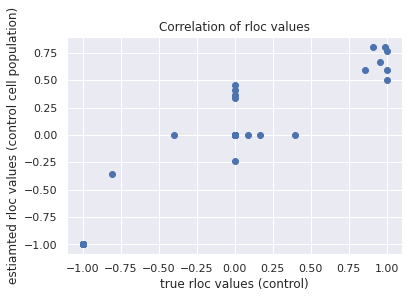

stot: 
             Sos       Ras     Raf1       Mek       Erk    P90Rsk      PI3K  \
Sos     0.404074         0        0         0         0         0         0   
Ras            0  0.129027        0         0         0         0         0   
Raf1           0         0  0.32371         0         0         0         0   
Mek            0         0        0  0.676342         0         0         0   
Erk            0         0        0         0  0.504597         0         0   
P90Rsk         0         0        0         0         0  0.536166         0   
PI3K           0         0        0         0         0         0  0.782697   
Akt            0         0        0         0         0         0         0   
C3G            0         0        0         0         0         0         0   
Rap1           0         0        0         0         0         0         0   
bRaf           0         0        0         0         0         0         0   

             Akt       C3G      Rap1      bR

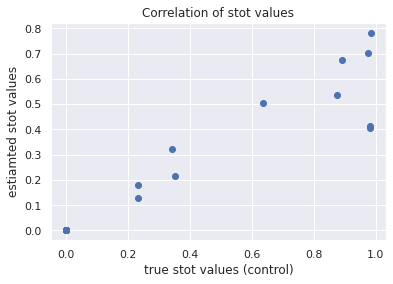

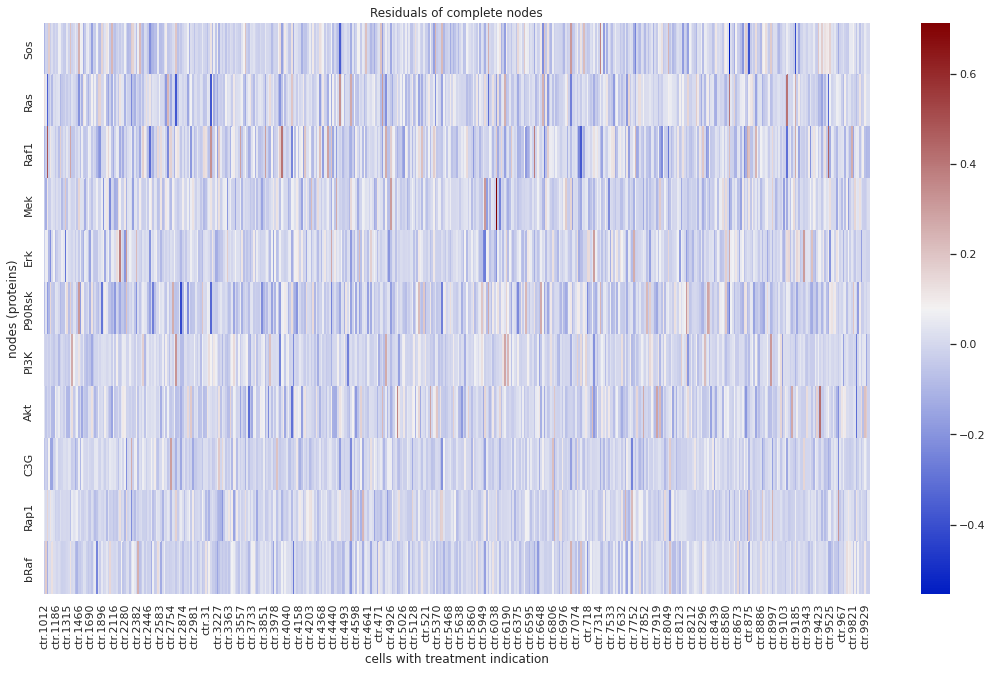

PERTURBATION STRENGTH: 
0.12466408044759213
-------- VARIABLE OVER VIEW --------
rloc: 
             Sos       Ras      Raf1       Mek       Erk    P90Rsk  PI3K  Akt  \
Sos    -1.000000  0.405967  0.000000  0.000000  0.000000 -0.358317   0.0  0.0   
Ras     0.499615 -1.000000  0.368483  0.000000  0.000000  0.000000   0.0  0.0   
Raf1    0.339172  0.588809 -1.000000  0.000000  0.000000  0.000000   0.0  0.0   
Mek     0.000000  0.000000  0.000000 -1.000000  0.298438  0.000000   0.0  0.0   
Erk     0.000000  0.000000  0.000000  0.805268 -1.000000  0.000000   0.0  0.0   
P90Rsk -0.231212  0.000000  0.000000  0.000000  0.664006 -1.000000   0.0  0.0   
PI3K    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  -1.0  0.0   
Akt     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0 -1.0   
C3G     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
Rap1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
bRaf    0.000000  0.0

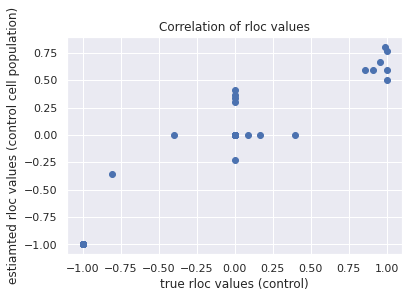

stot: 
             Sos       Ras     Raf1       Mek       Erk    P90Rsk      PI3K  \
Sos     0.404074         0        0         0         0         0         0   
Ras            0  0.129027        0         0         0         0         0   
Raf1           0         0  0.32371         0         0         0         0   
Mek            0         0        0  0.475987         0         0         0   
Erk            0         0        0         0  0.504597         0         0   
P90Rsk         0         0        0         0         0  0.527396         0   
PI3K           0         0        0         0         0         0  0.782697   
Akt            0         0        0         0         0         0         0   
C3G            0         0        0         0         0         0         0   
Rap1           0         0        0         0         0         0         0   
bRaf           0         0        0         0         0         0         0   

             Akt     C3G      Rap1      bRaf

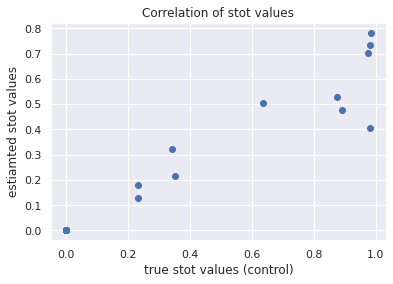

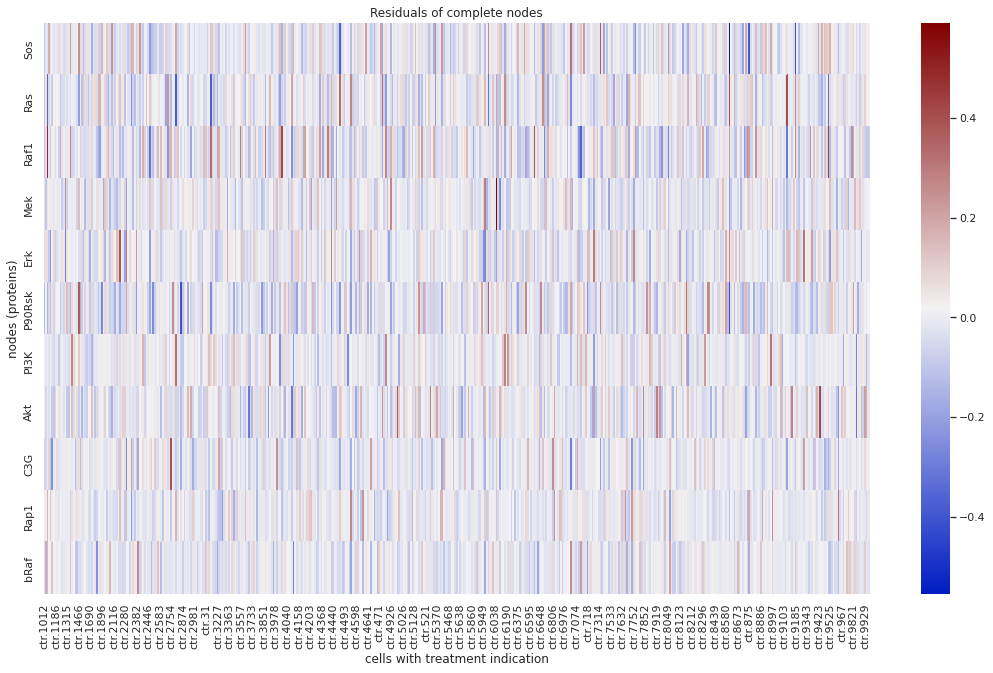

PERTURBATION STRENGTH: 
0.11301315162254012
-------- VARIABLE OVER VIEW --------
rloc: 
             Sos       Ras      Raf1       Mek       Erk    P90Rsk  PI3K  Akt  \
Sos    -1.000000  0.405967  0.000000  0.000000  0.000000 -0.358317   0.0  0.0   
Ras     0.499615 -1.000000  0.368483  0.000000  0.000000  0.000000   0.0  0.0   
Raf1    0.000000  0.844176 -1.000000  0.000000  0.000000  0.000000   0.0  0.0   
Mek     0.000000  0.000000  0.000000 -1.000000  0.000000  0.000000   0.0  0.0   
Erk     0.000000  0.000000  0.000000  0.805268 -1.000000  0.000000   0.0  0.0   
P90Rsk  0.000000  0.000000  0.000000  0.000000  0.769415 -1.000000   0.0  0.0   
PI3K    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  -1.0  0.0   
Akt     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0 -1.0   
C3G     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
Rap1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
bRaf    0.000000  0.0

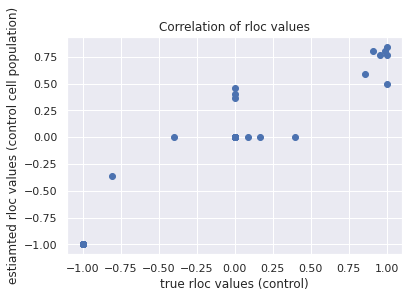

stot: 
             Sos       Ras      Raf1       Mek       Erk    P90Rsk      PI3K  \
Sos     0.404074         0         0         0         0         0         0   
Ras            0  0.129027         0         0         0         0         0   
Raf1           0         0  0.321614         0         0         0         0   
Mek            0         0         0  0.676342         0         0         0   
Erk            0         0         0         0  0.504597         0         0   
P90Rsk         0         0         0         0         0  0.634481         0   
PI3K           0         0         0         0         0         0  0.782697   
Akt            0         0         0         0         0         0         0   
C3G            0         0         0         0         0         0         0   
Rap1           0         0         0         0         0         0         0   
bRaf           0         0         0         0         0         0         0   

             Akt       C3G      

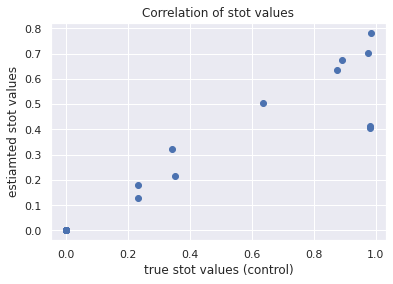

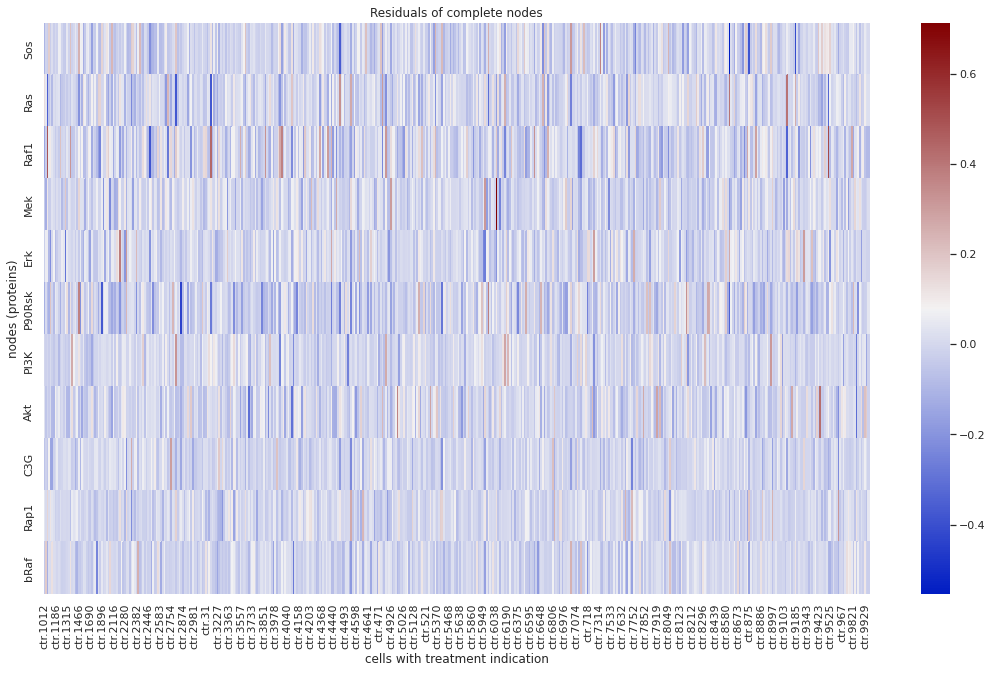

PERTURBATION STRENGTH: 
0.10506716472878427
-------- VARIABLE OVER VIEW --------
rloc: 
             Sos       Ras      Raf1       Mek       Erk    P90Rsk  PI3K  Akt  \
Sos    -1.000000  0.405967  0.000000  0.000000  0.000000 -0.358317   0.0  0.0   
Ras     0.499615 -1.000000  0.368483  0.000000  0.000000  0.000000   0.0  0.0   
Raf1    0.000000  0.844176 -1.000000  0.000000  0.000000  0.000000   0.0  0.0   
Mek     0.000000  0.000000  0.000000 -1.000000  0.000000  0.000000   0.0  0.0   
Erk     0.000000  0.000000  0.000000  0.805268 -1.000000  0.000000   0.0  0.0   
P90Rsk  0.000000  0.000000  0.000000  0.000000  0.769415 -1.000000   0.0  0.0   
PI3K    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  -1.0  0.0   
Akt     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0 -1.0   
C3G     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
Rap1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
bRaf    0.000000  0.0

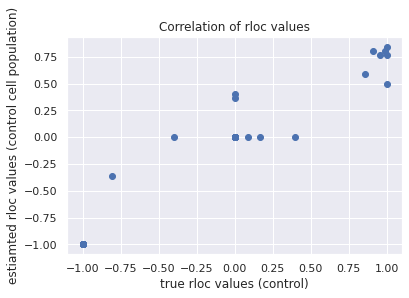

stot: 
             Sos       Ras      Raf1       Mek       Erk    P90Rsk      PI3K  \
Sos     0.404074         0         0         0         0         0         0   
Ras            0  0.129027         0         0         0         0         0   
Raf1           0         0  0.321614         0         0         0         0   
Mek            0         0         0  0.676342         0         0         0   
Erk            0         0         0         0  0.504597         0         0   
P90Rsk         0         0         0         0         0  0.634481         0   
PI3K           0         0         0         0         0         0  0.782697   
Akt            0         0         0         0         0         0         0   
C3G            0         0         0         0         0         0         0   
Rap1           0         0         0         0         0         0         0   
bRaf           0         0         0         0         0         0         0   

             Akt     C3G      Ra

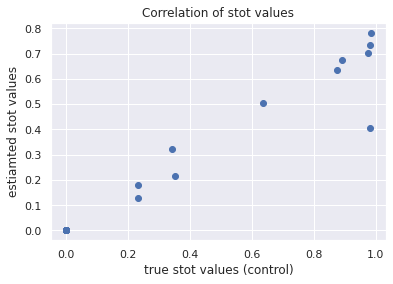

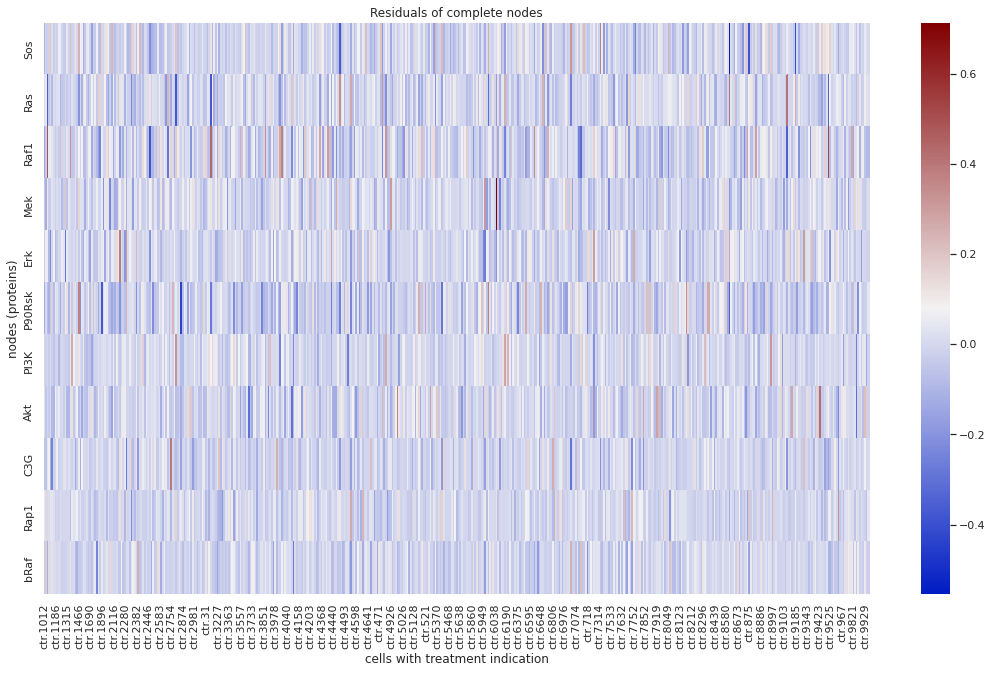

PERTURBATION STRENGTH: 


In [10]:
def result(s):
    s.rloc = reorder_rloc(s.rloc)
    rmse = calc_rmse(rloc_true, s.rloc)
    print(rmse)
    generate_overview(s)

result(s)
result(t)
result(u)
result(v)